In [1]:
%pip install numpy pandas scikit-learn matplotlib seaborn


  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.6 MB 9.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.6/12.6 MB 6.9 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.6 MB 6.6 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.6 MB 6.3 MB/s eta 0:00:02
   ------------------- -------------------- 6.3/12.6 MB 6.1 MB/s eta 0:00:02
   ----------------------- ---------------- 7.3/12.6 MB 6.0 MB/s eta 0:00:01
   -------------------------- ------------- 8.4/12.6 MB 6.0 MB


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names
 

In [9]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print("First five rows of the dataset:")
print(df.head())


First five rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wine

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [15]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=42)

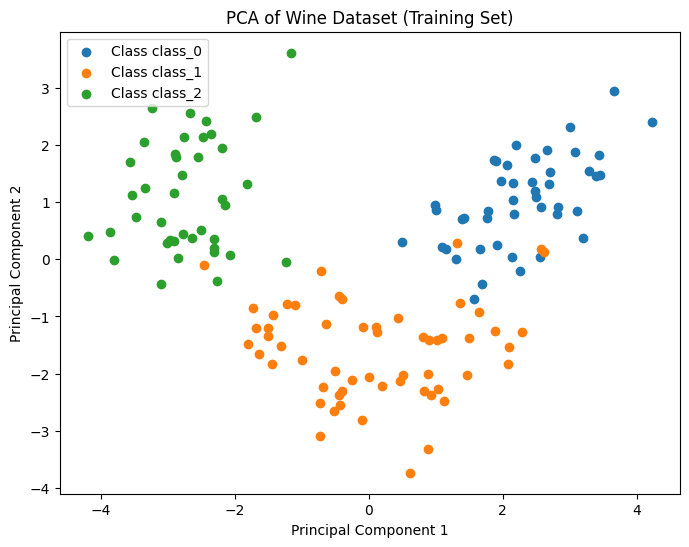

In [16]:
plt.figure(figsize=(8, 6))
for i, label in enumerate(target_names):
    plt.scatter(
        X_train_pca[y_train == i, 0],
        X_train_pca[y_train == i, 1],
        label=f"Class {label}"
    )
plt.title("PCA of Wine Dataset (Training Set)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


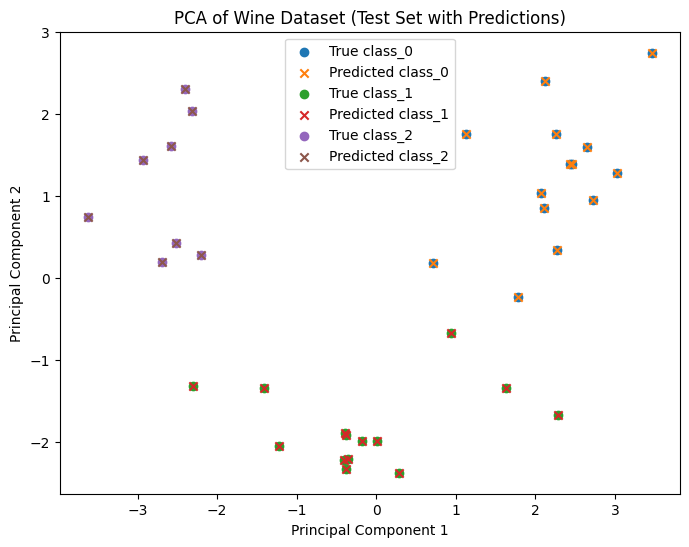

In [17]:
y_pred = svm_model.predict(X_test_pca)
plt.figure(figsize=(8, 6))
for i, label in enumerate(target_names):
    plt.scatter(
        X_test_pca[y_test == i, 0],
        X_test_pca[y_test == i, 1],
        label=f"True {label}",
        marker='o'
    )
    plt.scatter(
        X_test_pca[y_pred == i, 0],
        X_test_pca[y_pred == i, 1],
        label=f"Predicted {label}",
        marker='x'
    )
plt.title("PCA of Wine Dataset (Test Set with Predictions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()